In [213]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons, load_iris, load_breast_cancer
import scipy.spatial

from sklearn.decomposition import PCA, KernelPCA

In [190]:
def RBF_kernel(X1,X2,sigma):
    """
    Computes the RBF kernel between two sets of vectors   
    Args:
        X1 - an n1xd matrix with vectors x1_1,...,x1_n1 in the rows
        X2 - an n2xd matrix with vectors x2_1,...,x2_n2 in the rows
        sigma - the bandwidth (i.e. standard deviation) for the RBF/Gaussian kernel
    Returns:
        matrix of size n1xn2, with exp(-||x1_i-x2_j||^2/(2 sigma^2)) in position i,j
    """
    return np.exp(-scipy.spatial.distance.cdist(X1,X2,'sqeuclidean')/(2*sigma**2))


In [191]:
def KPCA(X,sigma,s):
    """
    Kernel PCA algorithm a la 'Machine Learning: a Probabalistic Perspective'
    """
    ## STEP 1 :
    
    # store number of data points N
    N = len(X)
    
    # Calculate Gram matrix K
    K = RBF_kernel(X,X,sigma)
    
    ## Centering
    H = np.eye(N) - np.ones((N,N)) / N
    
    ## STEP 3 : 
    Ktilde = H @ K @ H
    
    ## STEP 4 :
    L,U = np.linalg.eigh(Ktilde)

    ## STEP 5/6 : 
    V = U[:,-s:] / (np.sqrt(np.maximum(L[-s:],0)) + 1e-10)
    
    ## STEPS 7 and 8 only apply the embedding to a different input data set
    return (Ktilde @ V[::-1])
    

## IRIS data set

In [205]:
X,y = load_iris().data, load_iris().target

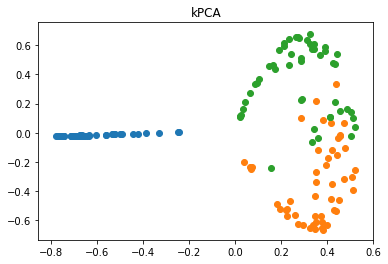

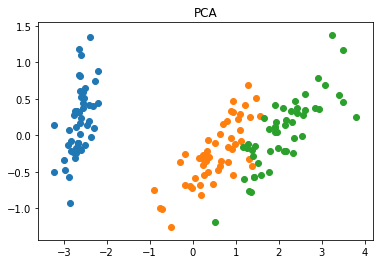

In [212]:

Z = KPCA(X,1,2)
for s in set(y):
    plt.scatter(*Z[y==s].T[:2])
plt.title("kPCA")
plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
for s in set(y):
    plt.scatter(*X_pca[y==s].T[:2])
plt.title("PCA")
plt.show()

It looks like the two algorithms do a similarly good job of forming clusters, just in different ways

## Half Moon Data

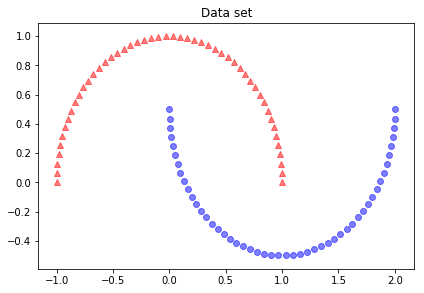

In [202]:
X,y = make_moons(n_samples = 100, random_state = 123)
plt.scatter(X[y==0,0],X[y==0,1],color='red',marker='^', alpha = .5)
plt.scatter(X[y==1,0],X[y==1,1],color='blue',marker='o',alpha= .5)
plt.tight_layout()
plt.title("Data set")
plt.show()

(100, 100)


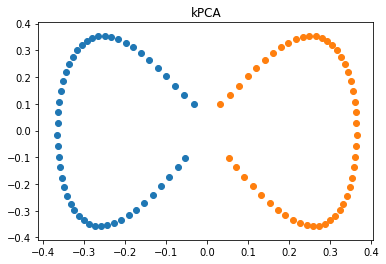

In [201]:
Z = KPCA(X,15,2)

plt.scatter(*Z[y==0].T[:2])
plt.scatter(*Z[y==1].T[:2])
plt.title("kPCA")
plt.show()

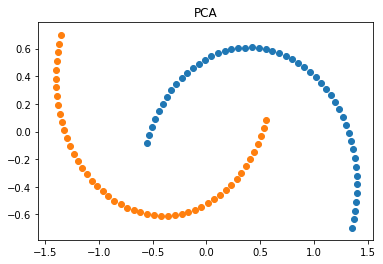

In [194]:

X_pca = pca.fit_transform(X)

plt.title("PCA")
plt.scatter(*X_pca[y==0].T)
plt.scatter(*X_pca[y==1].T)
plt.show()

Here, PCA obviously doesn't do very much because the data is two dimensional to begin with. The kPCA however forms two nicely symmetrical groupings that are easy to identify and separate.

## Breast Cancer data set

In [215]:
bc = load_breast_cancer()
X,y = bc.data, bc.target



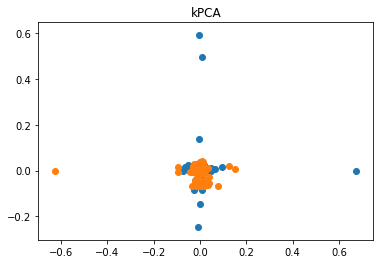

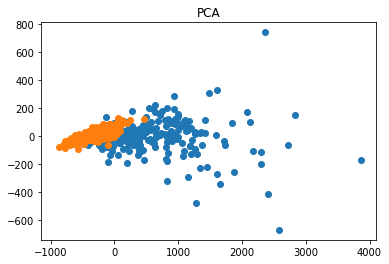

In [231]:

Z = KPCA(X,2.6,2)
for s in set(y):
    plt.scatter(*Z[y==s].T[:2])
plt.title("kPCA")
plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
for s in set(y):
    plt.scatter(*X_pca[y==s].T[:2])
plt.title("PCA")
plt.show()

Here, normal PCA actually is more intelligable. This is thanks to the fact that there is so much overlap between data points of different labels--In a way, retaining the linear aspect retained much of the clusters core characteristics, ie the spread of the blue and the tight clustering of the yellow.